In [118]:
#import some necessary librairies

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew
#Limiting floats output to 3 decimal points
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) 

In [119]:
# Load file to dataframe
def load_data(filename):
    df_val = pd.read_csv(filename, index_col=['row_id'])
    return df_val

In [120]:
filename = './data/train_values.csv'
x_train = load_data(filename)
filename = './data/test_values.csv'
test = load_data(filename)
filename = './data/train_labels.csv'
y_train = load_data(filename)
train = pd.concat([x_train, y_train], axis=1)


 mu = 279.37 and sigma = 58.94



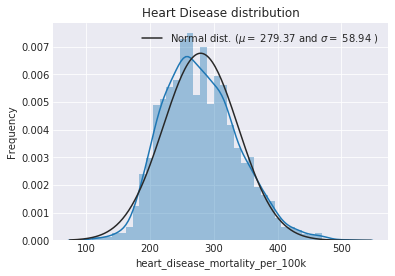

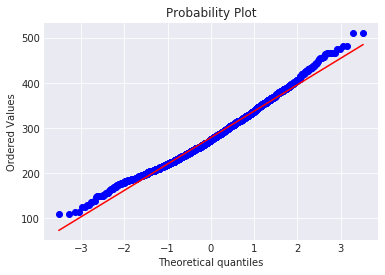

In [121]:
sns.distplot(train['heart_disease_mortality_per_100k'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['heart_disease_mortality_per_100k'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Heart Disease distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['heart_disease_mortality_per_100k'], plot=plt)
plt.show()


 mu = 5.61 and sigma = 0.21



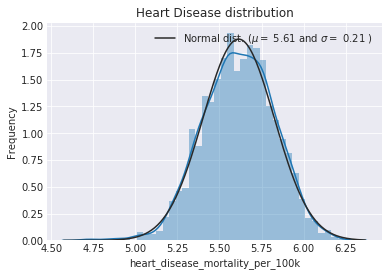

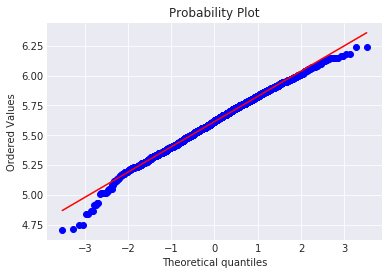

In [122]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["heart_disease_mortality_per_100k"] = \
    np.log1p(train["heart_disease_mortality_per_100k"])

#Check the new distribution 
sns.distplot(train['heart_disease_mortality_per_100k'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['heart_disease_mortality_per_100k'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Heart Disease distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['heart_disease_mortality_per_100k'], plot=plt)
plt.show()

In [123]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train['heart_disease_mortality_per_100k'].values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['heart_disease_mortality_per_100k'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (6278, 33)


In [124]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(25)

,Missing Ratio
health__homicides_per_100k,60.481
health__pct_excessive_drinking,29.277
health__pct_adult_smoking,13.794
health__motor_vehicle_crash_deaths_per_100k,12.138
health__pop_per_dentist,7.040
health__pop_per_primary_care_physician,6.594
health__pct_low_birthweight,5.241
health__air_pollution_particulate_matter,1.051
health__pct_adult_obesity,0.159
health__pct_diabetes,0.159


In [125]:
full_data = [all_data]

In [126]:
def area_map(area__rucc):
    if area__rucc == 'Metro - Counties in metro areas of 1 million population or more' or \
                    'Metro - Counties in metro areas of fewer than 250,000 population' or \
                    'Metro - Counties in metro areas of 250,000 to 1 million population':
        return 'Metro'
    else:
        return 'Nonmetro'
    
def area_urban(area__urban):
    if area__urban == 'Large-in a metro area with at least 1 million residents or more':
        return 'Large'
    else:
        return 'Small'
    
def econ_typo(econ__typology):
    if econ__typology == 'Manufacturing-dependent' or \
                    'Federal/State government-dependent' or \
                    'Mining-dependent':
        return 'Stress'
    else:
        return 'Nonstress'

for dataset in full_data:
    # Change to Metro and Non-metro
    dataset['area__rucc'] = dataset['area__rucc'].apply(area_map)
    dataset['area__rucc'] = dataset['area__rucc'].map({'Metro':1, 'Nonmetro':0})
    # Change to Large Influence and Small Influence
    dataset['area__urban_influence'] = \
        dataset['area__urban_influence'].apply(area_urban)
    dataset['area__urban_influence'] = \
        dataset['area__urban_influence'].map({'Large':1, 'Small':0})
    # Change to Stressfull Economy and Non-Stressfull
    dataset['econ__economic_typology'] = \
        dataset['econ__economic_typology'].apply(econ_typo)
    dataset['econ__economic_typology'] = \
        dataset['econ__economic_typology'].map({'Stress':1, 'Nonstress':0})
    # Change year
    dataset['yr'] = dataset['yr'].map({'a':1, 'b':0})

In [127]:
for dataset in full_data:
    dataset['econ__pct_uninsured_adults'].fillna( \
            dataset['econ__pct_uninsured_adults'].median(), inplace=True)
    dataset['econ__pct_uninsured_children'].fillna( \
            dataset['econ__pct_uninsured_children'].median(), inplace=True)
    dataset['demo__pct_female'].fillna( \
            dataset['demo__pct_female'].median(), inplace=True)
    dataset['demo__pct_below_18_years_of_age'].fillna( \
            dataset['demo__pct_below_18_years_of_age'].median(), inplace=True)
    dataset['demo__pct_aged_65_years_and_older'].fillna( \
            dataset['demo__pct_aged_65_years_and_older'].median(), inplace=True)
    dataset['demo__pct_hispanic'].fillna( \
            dataset['demo__pct_hispanic'].median(), inplace=True)
    dataset['demo__pct_non_hispanic_african_american'].fillna( \
            dataset['demo__pct_non_hispanic_african_american'].median(), inplace=True)
    dataset['demo__pct_non_hispanic_white'].fillna( \
            dataset['demo__pct_non_hispanic_white'].median(), inplace=True)
    dataset['demo__pct_american_indian_or_alaskan_native'].fillna( \
            dataset['demo__pct_american_indian_or_alaskan_native'].median(), inplace=True)
    dataset['demo__pct_asian'].fillna( \
            dataset['demo__pct_asian'].median(), inplace=True)
    dataset['health__pct_adult_obesity'].fillna( \
            dataset['health__pct_adult_obesity'].median(), inplace=True)
    dataset['health__pct_diabetes'].fillna( \
            dataset['health__pct_diabetes'].median(), inplace=True)
    dataset['health__pct_physical_inacticity'].fillna( \
            dataset['health__pct_physical_inacticity'].median(), inplace=True)
    dataset['health__air_pollution_particulate_matter'].fillna( \
            dataset['health__air_pollution_particulate_matter'].median(), inplace=True)

In [128]:
np.random.seed(3)
for dataset in full_data:
    # Smoking
    smoke_avg = dataset['health__pct_adult_smoking'].mean()
    smoke_std = dataset['health__pct_adult_smoking'].std()
    smoke_null_count = dataset['health__pct_adult_smoking'].isnull().sum()
    smoke_null_random_list = \
        np.random.uniform(smoke_avg - smoke_std, smoke_avg + smoke_std)
    dataset['health__pct_adult_smoking']\
        [np.isnan(dataset['health__pct_adult_smoking'])] = smoke_null_random_list
    dataset['health__pct_adult_smoking'] = \
        dataset['health__pct_adult_smoking'].astype(float)
    # Birthweight
    birth_avg = dataset['health__pct_low_birthweight'].mean()
    birth_std = dataset['health__pct_low_birthweight'].std()
    birth_null_count = dataset['health__pct_low_birthweight'].isnull().sum()
    birth_null_random_list = \
        np.random.uniform(birth_avg - birth_std, birth_avg + birth_std)
    dataset['health__pct_low_birthweight']\
        [np.isnan(dataset['health__pct_low_birthweight'])] = birth_null_random_list
    dataset['health__pct_low_birthweight'] = \
        dataset['health__pct_low_birthweight'].astype(float)
    # Drinking
    drink_avg = dataset['health__pct_excessive_drinking'].mean()
    drink_std = dataset['health__pct_excessive_drinking'].std()
    drink_null_count = dataset['health__pct_excessive_drinking'].isnull().sum()
    drink_null_random_list = \
        np.random.uniform(drink_avg - drink_std, drink_avg + drink_std)
    dataset['health__pct_excessive_drinking']\
        [np.isnan(dataset['health__pct_excessive_drinking'])] = drink_null_random_list
    dataset['health__pct_excessive_drinking'] = \
        dataset['health__pct_excessive_drinking'].astype(float)

In [129]:
drop_elements = ['health__homicides_per_100k', \
                 'health__motor_vehicle_crash_deaths_per_100k', \
                 'health__pop_per_dentist', 'health__pop_per_primary_care_physician']
all_data = all_data.drop(drop_elements, axis = 1)

In [130]:
#Check remaining missing values if any 
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = \
    all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [131]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = \
    all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
demo__pct_american_indian_or_alaskan_native,7.780
demo__pct_asian,7.338
demo__pct_hispanic,3.182
demo__pct_non_hispanic_african_american,2.282
area__urban_influence,2.104
demo__pct_adults_bachelors_or_higher,1.515
econ__pct_unemployment,1.195
econ__pct_uninsured_children,1.190
health__pct_excessive_drinking,1.017
demo__birth_rate_per_1k,0.951


In [132]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical \
    features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 29 skewed numerical     features to Box Cox transform


In [133]:
train = all_data[:ntrain]
test = all_data[ntrain:]
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(6278, 29)


In [134]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [135]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, \
                                   scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [136]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [137]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.1200 (0.0028)

ElasticNet score: 0.1200 (0.0028)

Kernel Ridge score: 0.1258 (0.0036)

Gradient Boosting score: 0.0996 (0.0035)

Xgboost score: 0.1075 (0.0031)



In [138]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [139]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1119 (0.0034)



In [140]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
# We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
#Do the predictions of all base models on the test data and use the averaged predictions as 
#meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [141]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1012 (0.0035)


In [142]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [143]:
# StackedRegressor:
stacked_averaged_models.fit(train.values, y_train)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train, stacked_train_pred))

0.0368899237412


In [144]:
# XGBoost:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.0791722744265


In [145]:
# RMSE on the entire Train data when averaging

print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.80 +
               xgb_train_pred*0.2))

RMSLE score on train data:
0.0440514609018


In [146]:
ensemble = stacked_pred*0.80 + xgb_pred*0.20

In [147]:
filename = './data/submission.csv'
sub = pd.read_csv(filename, index_col=['row_id'])
sub['heart_disease_mortality_per_100k'] = ensemble.astype(int)
sub.to_csv('submission_final.csv')